In [1]:
#imports
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data into dataframe
data = pd.read_csv("./data/X_train.csv")
data

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,1714,GP,F,18,U,GT3,T,4,3,other,...,no,4,3,3,1,1,3,0,14,13
1,1254,GP,F,17,U,GT3,T,4,3,health,...,yes,4,4,3,1,3,4,0,13,15
2,1639,GP,F,16,R,GT3,T,4,4,health,...,no,2,4,4,2,3,4,6,10,11
3,1118,GP,M,16,U,GT3,T,4,4,services,...,no,5,3,3,1,3,5,0,15,13
4,1499,GP,M,19,U,GT3,T,3,2,services,...,yes,4,5,4,1,1,4,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,1074,GP,M,15,U,GT3,T,4,4,services,...,no,5,3,3,1,1,5,4,10,13
674,1044,GP,M,15,R,GT3,T,4,4,other,...,yes,1,3,5,3,5,1,8,12,10
675,1078,GP,M,17,U,LE3,T,4,4,other,...,no,4,1,1,2,2,5,0,12,13
676,1055,MS,M,17,R,GT3,T,1,1,other,...,yes,4,5,5,1,3,2,0,10,9


In [3]:
#Load data into dataframe
XTest = pd.read_csv("./data/X_test.csv")
XTest

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,1000,GP,F,16,U,GT3,T,4,2,services,...,no,4,2,3,1,1,5,2,15,16
1,1008,GP,M,19,U,GT3,T,1,2,other,...,no,4,5,2,2,2,4,3,13,11
2,1013,GP,F,16,U,GT3,T,4,4,services,...,no,3,2,3,1,2,2,6,13,14
3,1014,GP,F,16,U,GT3,T,3,1,services,...,no,4,3,3,1,2,5,4,7,7
4,1017,GP,F,15,U,LE3,A,3,4,other,...,yes,5,3,2,1,1,1,0,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2032,GP,F,15,R,LE3,T,3,1,other,...,no,4,4,2,2,3,3,6,15,15
362,2034,GP,M,17,U,GT3,T,3,3,services,...,yes,4,3,4,2,3,4,12,12,12
363,2035,GP,F,16,U,GT3,T,2,3,services,...,no,2,3,1,1,1,3,2,16,16
364,2036,MS,F,16,U,GT3,T,3,1,other,...,no,3,1,3,1,3,1,0,8,6


In [4]:
#Load data into dataframe
YTest = pd.read_csv("./data/Y_test.csv")
YTest

,StudentID,G3
0,1000,16
1,1008,11
2,1013,14
3,1014,6
4,1017,11
...,...,...
361,2032,15
362,2034,11
363,2035,17
364,2036,8


In [5]:
#Load data into dataframe
YTrain = pd.read_csv("./data/Y_test.csv")
YTrain

,StudentID,G3
0,1000,16
1,1008,11
2,1013,14
3,1014,6
4,1017,11
...,...,...
361,2032,15
362,2034,11
363,2035,17
364,2036,8


In [6]:
#information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudentID   678 non-null    int64 
 1   school      678 non-null    object
 2   sex         678 non-null    object
 3   age         678 non-null    int64 
 4   address     678 non-null    object
 5   famsize     678 non-null    object
 6   Pstatus     678 non-null    object
 7   Medu        678 non-null    int64 
 8   Fedu        678 non-null    int64 
 9   Mjob        678 non-null    object
 10  Fjob        678 non-null    object
 11  reason      678 non-null    object
 12  guardian    678 non-null    object
 13  traveltime  678 non-null    int64 
 14  studytime   678 non-null    int64 
 15  failures    678 non-null    int64 
 16  schoolsup   678 non-null    object
 17  famsup      678 non-null    object
 18  paid        678 non-null    object
 19  activities  678 non-null    object
 20  nursery   

In [7]:
data[data.duplicated()]

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2


In [8]:
data[data['age'] == 18]

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,1714,GP,F,18,U,GT3,T,4,3,other,...,no,4,3,3,1,1,3,0,14,13
5,1634,MS,M,18,R,GT3,T,1,0,at_home,...,no,4,3,2,1,1,4,0,12,12
6,1928,GP,M,18,R,GT3,T,4,3,teacher,...,yes,5,3,2,1,2,4,9,16,15
10,1293,GP,F,18,U,GT3,T,4,4,teacher,...,no,4,4,4,3,3,5,2,11,11
15,1172,GP,F,18,U,GT3,T,2,2,other,...,yes,4,3,5,2,4,5,2,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,1206,MS,M,18,U,LE3,T,1,1,other,...,yes,3,3,2,1,2,3,2,14,13
655,1129,GP,F,18,R,GT3,T,3,1,other,...,yes,5,3,3,1,1,4,4,8,8
662,1080,GP,M,18,R,GT3,T,2,3,other,...,no,3,1,3,4,5,4,13,13,14
668,1516,GP,F,18,U,LE3,T,2,1,services,...,yes,5,4,3,1,1,5,12,12,12


In [9]:
data.isnull().sum()

StudentID     0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:

# Import libraries 
import numpy as np
import pandas as pd
  
# Import dataset
df = pd.read_csv("./data/X_train.csv")
  
df['Mjob'].unique()

array(['other', 'health', 'services', 'at_home', 'teacher'], dtype=object)

In [12]:
df.columns

Index(['StudentID', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [13]:
df['school'].unique()

array(['GP', 'MS'], dtype=object)

In [14]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Mjob']= label_encoder.fit_transform(df['Mjob'])
  
df['Mjob'].unique()

array([2, 1, 3, 0, 4])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudentID   678 non-null    int64 
 1   school      678 non-null    object
 2   sex         678 non-null    object
 3   age         678 non-null    int64 
 4   address     678 non-null    object
 5   famsize     678 non-null    object
 6   Pstatus     678 non-null    object
 7   Medu        678 non-null    int64 
 8   Fedu        678 non-null    int64 
 9   Mjob        678 non-null    object
 10  Fjob        678 non-null    object
 11  reason      678 non-null    object
 12  guardian    678 non-null    object
 13  traveltime  678 non-null    int64 
 14  studytime   678 non-null    int64 
 15  failures    678 non-null    int64 
 16  schoolsup   678 non-null    object
 17  famsup      678 non-null    object
 18  paid        678 non-null    object
 19  activities  678 non-null    object
 20  nursery   

In [16]:
data.columns

Index(['StudentID', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [17]:

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['school']= label_encoder.fit_transform(df['school'])
  
df['school'].unique()

array([0, 1])

In [18]:

from sklearn import preprocessing
label_encoder1 = preprocessing.LabelEncoder()
df['sex']= label_encoder1.fit_transform(df['sex'])
  
df['sex'].unique()

array([0, 1])

In [19]:
from sklearn import preprocessing
label_encoder2 = preprocessing.LabelEncoder()
df['address']= label_encoder2.fit_transform(df['address'])
  
df['address'].unique()

array([1, 0])

In [20]:
from sklearn import preprocessing
label_encoder3 = preprocessing.LabelEncoder()
df['famsize']= label_encoder3.fit_transform(df['famsize'])
  
df['famsize'].unique()

array([0, 1])

In [21]:
from sklearn import preprocessing
label_encoder4 = preprocessing.LabelEncoder()
df['Pstatus']= label_encoder4.fit_transform(df['Pstatus'])
  
df['Pstatus'].unique()

array([1, 0])

In [22]:
from sklearn import preprocessing
label_encoder5 = preprocessing.LabelEncoder()
df['Fjob']= label_encoder5.fit_transform(df['Fjob'])
  
df['Fjob'].unique()

array([2, 4, 3, 0, 1])

In [23]:
from sklearn import preprocessing
label_encoder6 = preprocessing.LabelEncoder()
df['Mjob']= label_encoder6.fit_transform(df['Mjob'])
  
df['Mjob'].unique()

array([2, 1, 3, 0, 4], dtype=int64)

In [24]:
from sklearn import preprocessing
label_encoder7 = preprocessing.LabelEncoder()
df['reason']= label_encoder7.fit_transform(df['reason'])
  
df['reason'].unique()

array([3, 2, 0, 1])

In [25]:
from sklearn import preprocessing
label_encoder8 = preprocessing.LabelEncoder()
df['guardian']= label_encoder8.fit_transform(df['guardian'])
  
df['guardian'].unique()

array([0, 1, 2])

In [26]:
from sklearn import preprocessing
label_encoder9 = preprocessing.LabelEncoder()
df['schoolsup']= label_encoder9.fit_transform(df['schoolsup'])
  
df['schoolsup'].unique()

array([0, 1])

In [27]:
from sklearn import preprocessing
label_encoder0 = preprocessing.LabelEncoder()
df['famsup']= label_encoder0.fit_transform(df['famsup'])
  
df['famsup'].unique()

array([1, 0])

In [28]:
from sklearn import preprocessing
label_encoder11 = preprocessing.LabelEncoder()
df['paid']= label_encoder11.fit_transform(df['paid'])
  
df['paid'].unique()

array([1, 0])

In [29]:
from sklearn import preprocessing
label_encoder12 = preprocessing.LabelEncoder()
df['activities']= label_encoder12.fit_transform(df['activities'])
  
df['activities'].unique()

array([0, 1])

In [30]:
df['romantic'].unique()

array(['no', 'yes'], dtype=object)

In [31]:
from sklearn import preprocessing
label_encoder13 = preprocessing.LabelEncoder()
df['nursery']= label_encoder13.fit_transform(df['nursery'])
  
df['nursery'].unique()

array([1, 0])

In [32]:
from sklearn import preprocessing
label_encoder14 = preprocessing.LabelEncoder()
df['higher']= label_encoder14.fit_transform(df['higher'])
  
df['higher'].unique()

array([1, 0])

In [33]:
from sklearn import preprocessing
label_encoder14 = preprocessing.LabelEncoder()
df['internet']= label_encoder14.fit_transform(df['internet'])
  
df['internet'].unique()

array([1, 0])

In [34]:
from sklearn import preprocessing
label_encoder15 = preprocessing.LabelEncoder()
df['romantic']= label_encoder15.fit_transform(df['romantic'])
  
df['romantic'].unique()

array([0, 1])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   StudentID   678 non-null    int64
 1   school      678 non-null    int32
 2   sex         678 non-null    int32
 3   age         678 non-null    int64
 4   address     678 non-null    int32
 5   famsize     678 non-null    int32
 6   Pstatus     678 non-null    int32
 7   Medu        678 non-null    int64
 8   Fedu        678 non-null    int64
 9   Mjob        678 non-null    int64
 10  Fjob        678 non-null    int32
 11  reason      678 non-null    int32
 12  guardian    678 non-null    int32
 13  traveltime  678 non-null    int64
 14  studytime   678 non-null    int64
 15  failures    678 non-null    int64
 16  schoolsup   678 non-null    int32
 17  famsup      678 non-null    int32
 18  paid        678 non-null    int32
 19  activities  678 non-null    int32
 20  nursery     678 non-null    int3

In [36]:
for col in df.columns:
    for val in df[col]:
        if val == "GP":
            print(col)

In [37]:
df.corr()

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
StudentID,1.000000,0.046057,-0.066329,-0.025568,0.036945,-0.028710,-0.037953,0.033835,0.008819,0.011961,...,0.020872,0.013933,0.028179,-0.065217,-0.040965,-0.064961,-0.014153,-0.038585,0.062156,0.073663
school,0.046057,1.000000,-0.040017,0.171610,-0.374226,0.017946,0.021009,-0.245666,-0.170531,-0.183599,...,0.084677,-0.049383,0.047859,0.091688,0.071382,0.038148,-0.055394,-0.143469,-0.193750,-0.174849
sex,-0.066329,-0.040017,1.000000,-0.022712,0.040551,0.096130,0.055290,0.101302,0.031212,0.161586,...,-0.128350,0.059213,0.148759,0.008230,0.255305,0.294224,0.128987,-0.024204,-0.037750,-0.021729
age,-0.025568,0.171610,-0.022712,1.000000,-0.054451,0.028147,-0.023765,-0.132860,-0.140538,-0.087049,...,0.189963,0.010495,0.032327,0.117159,0.109528,0.085824,-0.056425,0.132313,-0.106158,-0.109604
address,0.036945,-0.374226,0.040551,-0.054451,1.000000,0.070086,-0.085536,0.191145,0.123744,0.155358,...,-0.050964,0.000420,-0.000919,0.057691,-0.025912,-0.014202,-0.012959,0.021236,0.122181,0.133828
famsize,-0.028710,0.017946,0.096130,0.028147,0.070086,1.000000,-0.150851,0.003067,-0.023539,0.101592,...,-0.026363,-0.006099,-0.010497,-0.005238,0.084366,0.077003,-0.017895,0.003831,0.112633,0.090082
Pstatus,-0.037953,0.021009,0.055290,-0.023765,-0.085536,-0.150851,1.000000,-0.085834,-0.028804,-0.071079,...,-0.034420,0.039084,0.034619,0.018661,0.008058,0.055614,-0.010847,-0.121728,0.007561,0.019729
Medu,0.033835,-0.245666,0.101302,-0.132860,0.191145,0.003067,-0.085834,1.000000,0.637230,0.465771,...,-0.013212,0.030544,-0.028747,-0.011983,-0.000146,-0.005991,-0.011018,0.079398,0.254589,0.253413
Fedu,0.008819,-0.170531,0.031212,-0.140538,0.123744,-0.023539,-0.028804,0.637230,1.000000,0.274365,...,-0.044997,0.012340,-0.059096,-0.001513,-0.001756,0.059653,0.070966,0.055754,0.208222,0.203855
Mjob,0.011961,-0.183599,0.161586,-0.087049,0.155358,0.101592,-0.071079,0.465771,0.274365,1.000000,...,-0.078996,0.070874,0.077956,-0.039567,0.073891,0.024849,0.104280,0.054817,0.119657,0.104443


<Axes: >

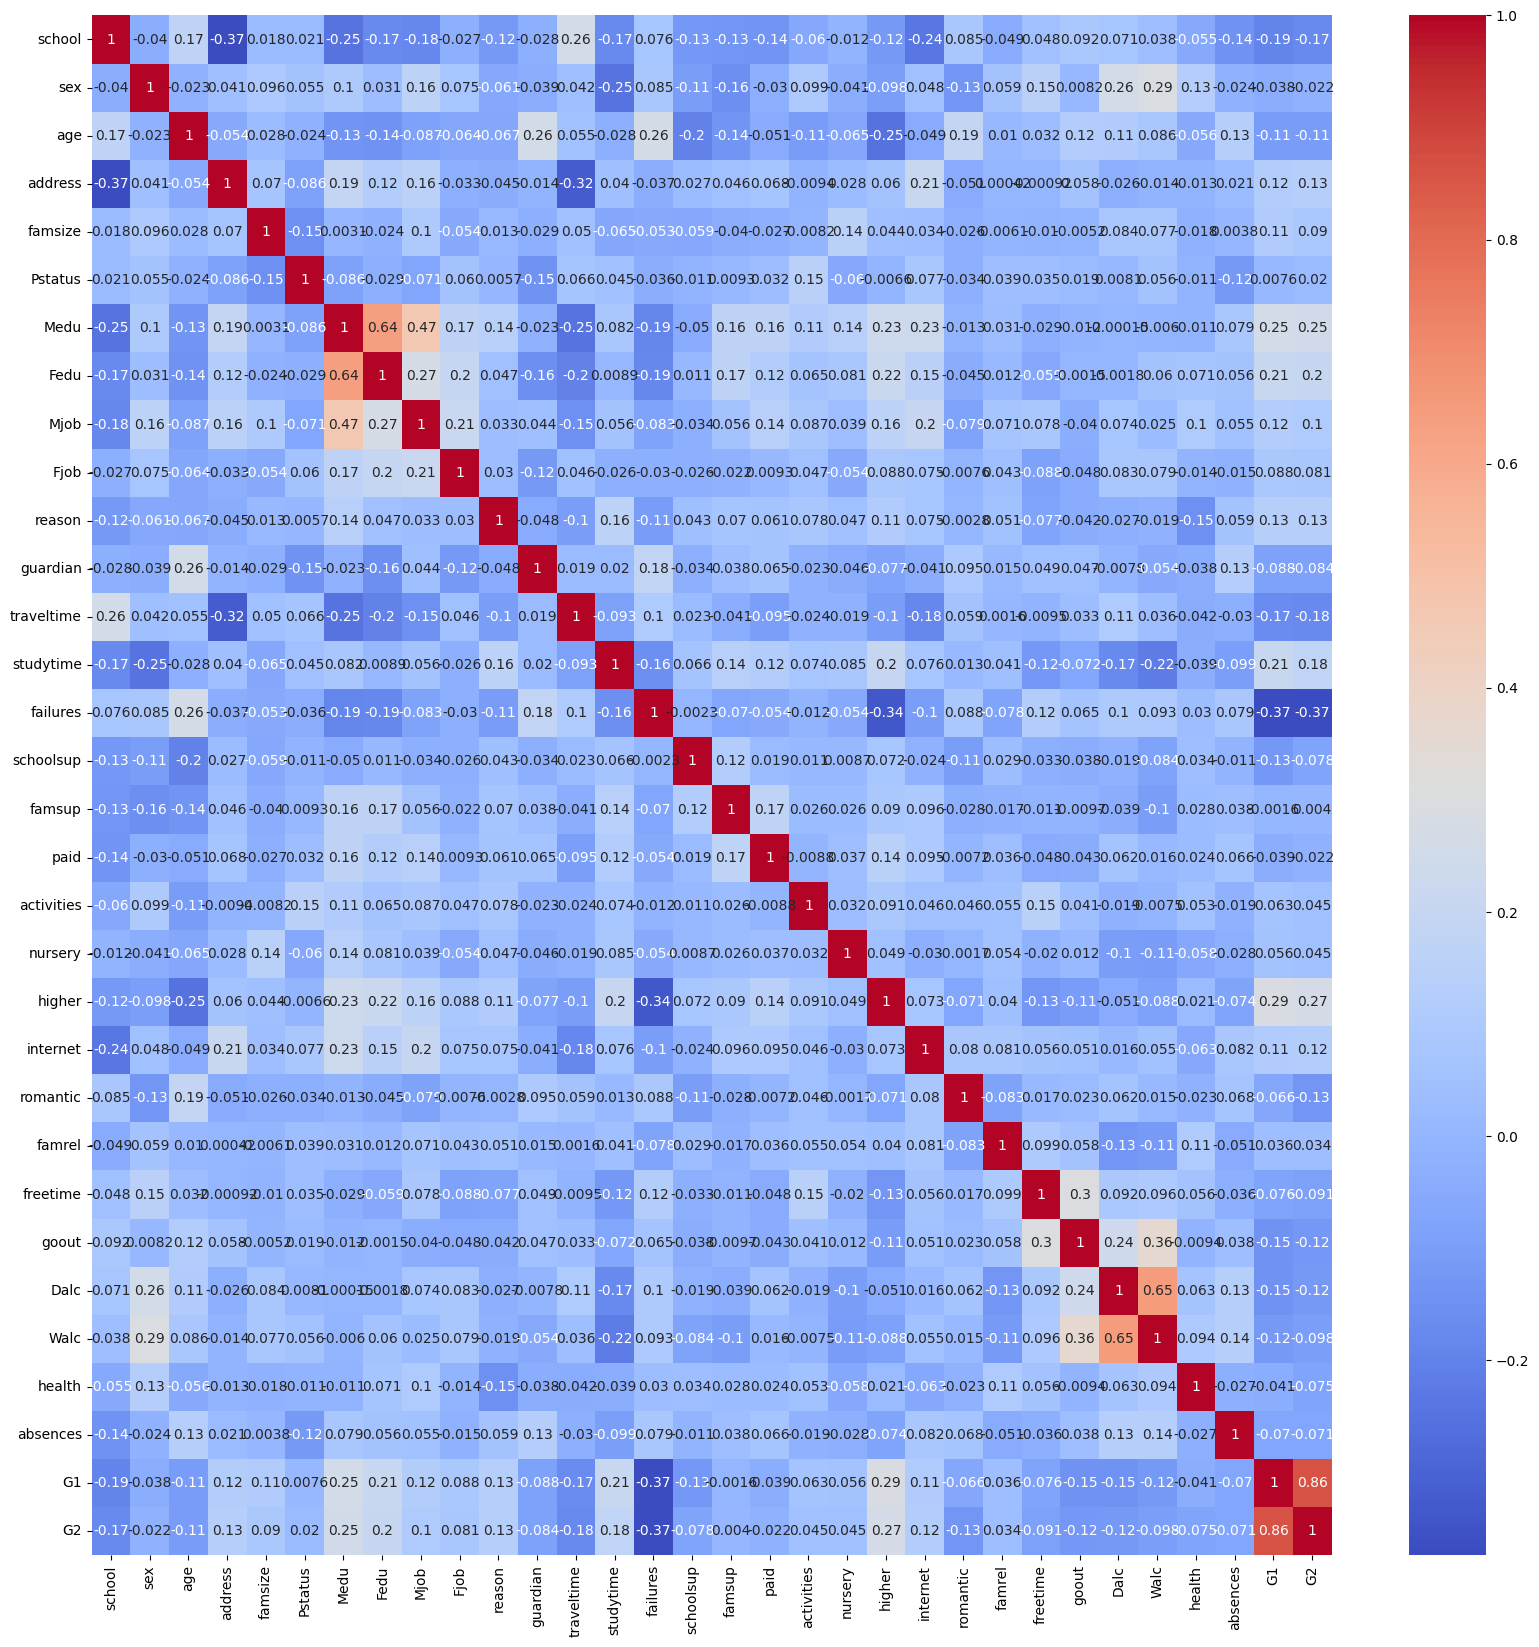

In [63]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

In [40]:
df.drop(['StudentID'], axis=1, inplace=True)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,0,1,4,3,2,2,...,0,4,3,3,1,1,3,0,14,13
1,0,0,17,1,0,1,4,3,1,2,...,1,4,4,3,1,3,4,0,13,15
2,0,0,16,0,0,1,4,4,1,4,...,0,2,4,4,2,3,4,6,10,11
3,0,1,16,1,0,1,4,4,3,3,...,0,5,3,3,1,3,5,0,15,13
4,0,1,19,1,0,1,3,2,3,0,...,1,4,5,4,1,1,4,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,0,1,15,1,0,1,4,4,3,2,...,0,5,3,3,1,1,5,4,10,13
674,0,1,15,0,0,1,4,4,2,2,...,1,1,3,5,3,5,1,8,12,10
675,0,1,17,1,1,1,4,4,2,4,...,0,4,1,1,2,2,5,0,12,13
676,1,1,17,0,0,1,1,1,2,3,...,1,4,5,5,1,3,2,0,10,9


In [41]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [42]:
X = df.drop(['G2'], axis=1)
y = df['G2']
print(X)

     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    0   18        1        0        1     4     3     2     2  ...   
1         0    0   17        1        0        1     4     3     1     2  ...   
2         0    0   16        0        0        1     4     4     1     4  ...   
3         0    1   16        1        0        1     4     4     3     3  ...   
4         0    1   19        1        0        1     3     2     3     0  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
673       0    1   15        1        0        1     4     4     3     2  ...   
674       0    1   15        0        0        1     4     4     2     2  ...   
675       0    1   17        1        1        1     4     4     2     4  ...   
676       1    1   17        0        0        1     1     1     2     3  ...   
677       0    0   17        1        0        1     3     2     1     1  ...   

     internet  romantic  fa

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42        #test size=20%=0.2 (0-1).Random state=42(jati click garera run gareni x train,test stays in same order.order depends on value.)
)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((542, 31), (136, 31), (542,), (136,))

In [45]:
lr_model = LinearRegression()

In [46]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [47]:
pd.DataFrame(lr_model.coef_, X.columns, columns=['coeficient'])

,coeficient
school,0.200363
sex,0.020625
age,0.024390
address,0.024701
famsize,0.159188
Pstatus,-0.216684
Medu,0.176064
Fedu,0.013189
Mjob,-0.099900
Fjob,0.022337


In [48]:
y_pred = lr_model.predict(X_test)

In [49]:
com = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred}).reset_index()
com

,index,y_test,y_pred
0,646,11,8.920068
1,336,5,7.042224
2,63,12,10.497124
3,367,17,16.689580
4,101,12,9.777818
...,...,...,...
131,110,11,11.737217
132,82,17,14.888993
133,51,12,12.894381
134,617,11,14.301728


In [50]:
len_test = len(y_pred)
default_arr = np.array(range(len_test))
default_arr

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135])

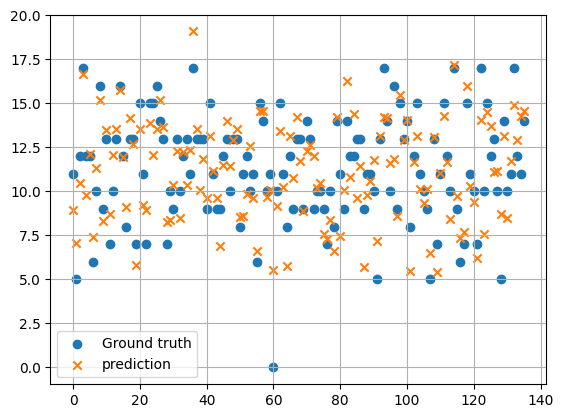

In [51]:
import matplotlib.pyplot as plt
plt.scatter(default_arr, y_test, marker='o', label="Ground truth")
plt.scatter(default_arr, y_pred, marker='x', label='prediction')
plt.legend()
plt.grid()

In [52]:
lr_model.score(X_test, y_test)

0.710682758857567

In [53]:
from sklearn import metrics #model check
import numpy as np

In [54]:
MSE = metrics.mean_squared_error(y_test, y_pred)
EMSE= np.sqrt(MSE)

In [64]:
MSE

2.660526686537251

# Decision Tree Regression

In [121]:
from sklearn.tree import DecisionTreeRegressor

In [122]:
decisionTree = DecisionTreeRegressor()

In [123]:
decisionTree.fit(X_train, y_train)

DecisionTreeRegressor()

In [124]:
decision_y_pred = decisionTree.predict(X_test)

In [125]:
com = pd.DataFrame({'decision_y_test':y_test,'decision_y_pred':decision_y_pred})
com

,decision_y_test,decision_y_pred
646,11,10.0
336,5,5.0
63,12,12.0
367,17,19.0
101,12,10.0
...,...,...
110,11,11.0
82,17,16.0
51,12,12.0
617,11,14.0


In [126]:
decisionTree.score(X_test,y_test)

0.569020560066319

In [127]:
m = decisionTree.predict(X_test)

In [128]:
com = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred}).reset_index()
com

,index,y_test,y_pred
0,646,11,8.920068
1,336,5,7.042224
2,63,12,10.497124
3,367,17,16.689580
4,101,12,9.777818
...,...,...,...
131,110,11,11.737217
132,82,17,14.888993
133,51,12,12.894381
134,617,11,14.301728


In [129]:
len_test = len(m)
default_arr = np.array(range(len_test))
default_arr

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135])

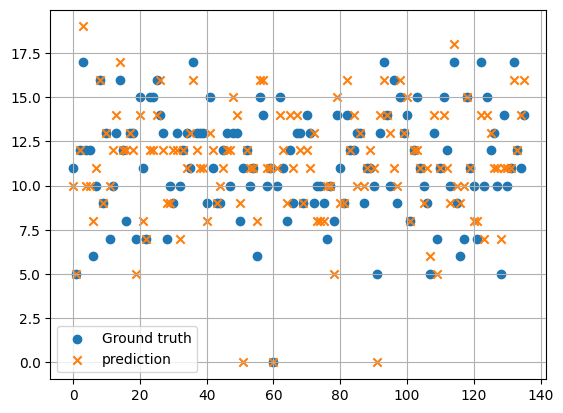

In [130]:
import matplotlib.pyplot as plt
plt.scatter(default_arr, y_test, marker='o', label="Ground truth")
plt.scatter(default_arr, m, marker='x', label='prediction')
plt.legend()
plt.grid()

In [131]:
lr_model.score(X_test, y_test)

0.710682758857567

In [132]:
from sklearn import metrics #model check
import numpy as np

In [133]:
MSE = metrics.mean_squared_error(y_test, y_pred)
EMSE= np.sqrt(MSE)

In [134]:
MSE

2.660526686537251